# Question 0:
On considère la fonction suivante :

$$f(t) = t^3$$

Sa dérivée est donnée par :

$$f'(t) = 3t^2$$

On observe que $$ f'(0) = 0 $$et, $f$ n'admet pas d’extremum local en $$ t = 0 $$


In [16]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng()

In [14]:
# On fixe X = 1 pour tout le monde
X_train = np.ones(1000)

# Générer un bruit asymétrique : une mixture de gaussiennes
# 70% de bruit centré à 0, 30% centré à 3 → asymétrie
noise = np.concatenate([
    rng.normal(loc=0, scale=1, size=700),
    rng.normal(loc=3, scale=1, size=300)
])

# Définir Y = X³ + bruit
Y_train = X_train**3 + noise  # X = 1 ⇒ X³ = 1 ⇒ Y ≈ 1 + bruit asymétrique


In [20]:
f_star_squared = np.mean(Y_train)
f_star_absolute = np.median(Y_train)

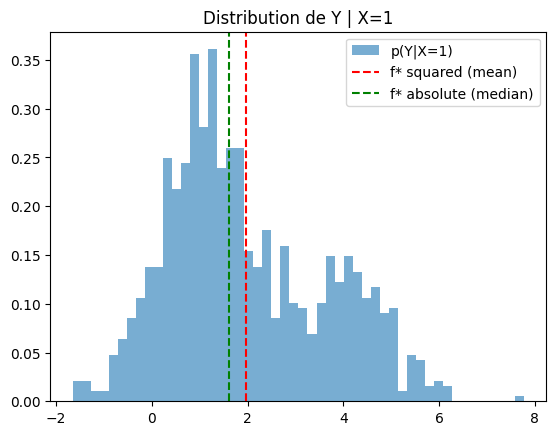

In [21]:
plt.hist(Y_train, bins=50, density=True, alpha=0.6, label="p(Y|X=1)")
plt.axvline(f_star_squared, color='red', linestyle='--', label="f* squared (mean)")
plt.axvline(f_star_absolute, color='green', linestyle='--', label="f* absolute (median)")
plt.title("Distribution de Y | X=1")
plt.legend()
plt.show()

In [22]:
# Génération du test set avec même X=1 et même bruit
noise_test = np.concatenate([
    rng.normal(loc=0, scale=1, size=700),
    rng.normal(loc=3, scale=1, size=300)
])
X_test = np.ones(1000)
Y_test = X_test**3 + noise_test

# Risque empirique
def squared_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

def absolute_loss(y_pred, y_true):
    return np.mean(np.abs(y_pred - y_true))

# Evaluation
sq_f_sq = squared_loss(f_star_squared, Y_test)
ab_f_sq = absolute_loss(f_star_squared, Y_test)

sq_f_ab = squared_loss(f_star_absolute, Y_test)
ab_f_ab = absolute_loss(f_star_absolute, Y_test)

print("Risques (f* squared):")
print("- Squared loss :", sq_f_sq)
print("- Absolute loss:", ab_f_sq)

print("Risques (f* absolute):")
print("- Squared loss :", sq_f_ab)
print("- Absolute loss:", ab_f_ab)


Risques (f* squared):
- Squared loss : 2.7938198910292105
- Absolute loss: 1.3789963715483806
Risques (f* absolute):
- Squared loss : 2.9366129679530015
- Absolute loss: 1.356474819765284


## Question 2

On cherche à minimiser :  
$$
g(z) = \mathbb{E}[|Y - z| \mid X = x] = \int_{-\infty}^{\infty} |y - z| \cdot p(y) \, dy
$$

On découpe l’intégrale :  
$$
g(z) = \int_{-\infty}^{z} (z - y) p(y) \, dy + \int_{z}^{\infty} (y - z) p(y) \, dy
$$

On dérive sous le signe intégral (en utilisant le théorème de Leibniz) :  
$$
g'(z) = \frac{d}{dz} \left[ \int_{-\infty}^{z} (z - y) p(y) \, dy + \int_{z}^{\infty} (y - z) p(y) \, dy \right]
$$
$$
= \int_{-\infty}^{z} p(y) \, dy - \int_{z}^{\infty} p(y) \, dy = 2F(z) - 1
$$


## Résultat :

Le minimum de $g(z)$ est atteint lorsque $g'(z) = 0$, donc $F(z) = 0.5$.  
Autrement dit, le prédicteur de Bayes pour la loss absolue est :

$$
f^*_{\text{absolute}}(x) = \text{médiane de } Y \mid X = x
$$
